<a href="https://colab.research.google.com/github/akhil7philip/Agriculture/blob/main/Agri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install -q catboost

     |████████████████████████████████| 76.1 MB 1.7 MB/s 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn import svm 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from lightgbm import LGBMClassifier 
from catboost import CatBoostClassifier 
from xgboost import XGBClassifier

In [ ]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' 

pd.set_option('display.max_colwidth', -1) 

import warnings 
warnings.simplefilter('ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [ ]:
from google.colab import files 
files.upload()

#!unzip -q <file.zip>

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


{'sample_submission.csv': b'ID,Crop_Damage\r\nF00000002,1\r\nF00000011,1\r\nF00000014,1\r\nF00000015,1\r\nF00000016,1\r\nF00000019,1\r\nF00000025,1\r\nF00000031,1\r\nF00000032,1\r\nF00000033,1\r\nF00000034,1\r\nF00000036,1\r\nF00000040,1\r\nF00000041,1\r\nF00000043,1\r\nF00000046,1\r\nF00000047,1\r\nF00000051,1\r\nF00000053,1\r\nF00000057,1\r\nF00000060,1\r\nF00000061,1\r\nF00000064,1\r\nF00000066,1\r\nF00000069,1\r\nF00000070,1\r\nF00000073,1\r\nF00000088,1\r\nF00000093,1\r\nF00000094,1\r\nF00000098,1\r\nF00000099,1\r\nF00000101,1\r\nF00000102,1\r\nF00000110,1\r\nF00000112,1\r\nF00000114,1\r\nF00000128,1\r\nF00000132,1\r\nF00000138,1\r\nF00000142,1\r\nF00000144,1\r\nF00000146,1\r\nF00000149,1\r\nF00000152,1\r\nF00000158,1\r\nF00000161,1\r\nF00000170,1\r\nF00000172,1\r\nF00000173,1\r\nF00000179,1\r\nF00000184,1\r\nF00000186,1\r\nF00000194,1\r\nF00000195,1\r\nF00000200,1\r\nF00000201,1\r\nF00000207,1\r\nF00000208,1\r\nF00000214,1\r\nF00000216,1\r\nF00000222,1\r\nF00000224,1\r\nF00000225

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

# Hackathon tips

* Understand problem statement well; if not given, identify problem statement (objective of problem)
* Remove ID column from dataset; don't want model to be trained based on that
* Hypothesis generation based on problem; like is young more likely to deposit more than old 
* EDA: summarise train, target distribution, null values, unique values, categorical (pie, bar) and numerical (box, hist) values visualisation, bivariate and multivariate analysis, heat maps to find correlation; look into pandas-profiling; Advanced steps like Feature Importance Scores
* Metrics: F1 score
* Build a baseline model to get basic score
* Steps to build model: 
    * Concatenate train and test sets, as data preprocessing should be done on both train and test sets together; 
    * Convert all categorical variables into numbers (OneHot Encoding); 
    * Fill null values; 
    * Split dataset into train and test sets; 
    * Split train set into train and validation sets; 
    * Fit a classification model on train, check result on validation set; 
    * Predict test set

# EDA

## Summarise data

In [ ]:
print(f'Train contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'Test contains {test.shape[0]} samples and {test.shape[1]} variables')

Train contains 88858 samples and 10 variables
Test contains 59310 samples and 9 variables


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


##Target Distribution

In [ ]:
#0=alive, 1=damage due to other causes, 2=damage due to pesticides
train['Crop_Damage'].value_counts(normalize=True)

0    0.835468
1    0.138502
2    0.026030
Name: Crop_Damage, dtype: float64

<function matplotlib.pyplot.show>

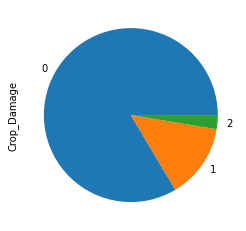

In [ ]:
train['Crop_Damage'].value_counts().plot(kind='pie')
plt.show

##Null values

In [ ]:
# percentage of null values in each column
(train.isnull().sum()/train.shape[0]*100).sort_values(ascending=False)

Number_Weeks_Used          10.12852
ID                         0.00000 
Estimated_Insects_Count    0.00000 
Crop_Type                  0.00000 
Soil_Type                  0.00000 
Pesticide_Use_Category     0.00000 
Number_Doses_Week          0.00000 
Number_Weeks_Quit          0.00000 
Season                     0.00000 
Crop_Damage                0.00000 
dtype: float64

*we see that only 'Number_Weeks_Used' has null values*

##Unique values

In [ ]:
train.nunique()

ID                         88858
Estimated_Insects_Count    71   
Crop_Type                  2    
Soil_Type                  2    
Pesticide_Use_Category     3    
Number_Doses_Week          20   
Number_Weeks_Used          64   
Number_Weeks_Quit          51   
Season                     3    
Crop_Damage                3    
dtype: int64

## Analyse each variable and relationships

### Intro

**Data types**: Nominal data, Categorical data

**Types of Analysis**: Univariate and Multi-variate


In [ ]:
columns = [col for col in train.columns if col not in ['ID','Crop_Damage']]
cat_cols = ['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season']
num_cols = [cols for cols in columns if cols not in cat_cols]
num_cols

['Estimated_Insects_Count',
 'Number_Doses_Week',
 'Number_Weeks_Used',
 'Number_Weeks_Quit']

###Dealing with categorical data

In [ ]:
for col in cat_cols:
     print((train[col].value_counts()/train.shape[0]*100).sort_values(ascending=False))

0    71.562493
1    28.437507
Name: Crop_Type, dtype: float64
0    54.15832
1    45.84168
Name: Soil_Type, dtype: float64
2    71.697540
3    27.360508
1    0.941952 
Name: Pesticide_Use_Category, dtype: float64
2    49.753539
1    30.275271
3    19.971190
Name: Season, dtype: float64


Text(0.5, 1.0, 'Crop_Type')

Text(0.5, 1.0, 'Soil_Type')

Text(0.5, 1.0, 'Pesticide_Use_Category')

Text(0.5, 1.0, 'Season')

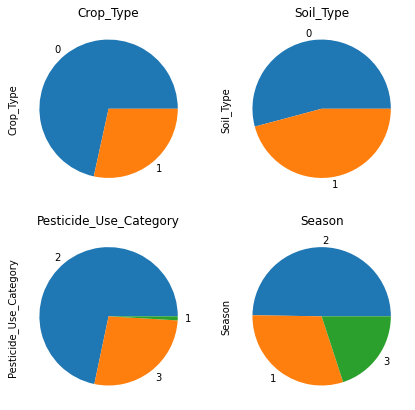

In [ ]:
 #plt.figure(figsize=(10,20))
 
 for i,col in enumerate(cat_cols):
     plt.subplot(2,2,i+1)
     train[col].value_counts().plot(kind='pie', figsize=(7,7))
     plt.title(col)

# Pesticide_Use_Category : 1-Never, 2-Previously Used, 3-Currently Using

Text(0.5, 1.0, 'Crop_Type')

Text(0.5, 1.0, 'Soil_Type')

Text(0.5, 1.0, 'Pesticide_Use_Category')

Text(0.5, 1.0, 'Season')

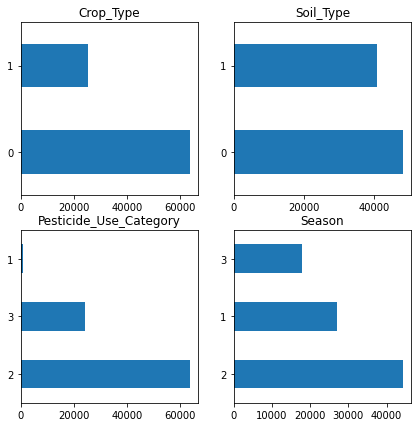

In [ ]:
 #plt.figure(figsize=(10,20))
 
 for i,col in enumerate(cat_cols):
     plt.subplot(2,2,i+1)
     train[col].value_counts().plot(kind='barh', figsize=(7,7))
     plt.title(col)

# Pesticide_Use_Category : 1-Never, 2-Previously Used, 3-Currently Using

### Bivariate Analysis

In [ ]:
for col in cat_cols:
     print(col, train[col].unique())

Crop_Type [1 0]
Soil_Type [0 1]
Pesticide_Use_Category [1 3 2]
Season [1 2 3]


In [ ]:
for i,col in enumerate(cat_cols):
    print(train[[col,'Crop_Damage']].value_counts(normalize=True,sort=False).reset_index().rename(columns={0:'counts'}))

   Crop_Type  Crop_Damage    counts
0  0          0            0.593959
1  0          1            0.103581
2  0          2            0.018085
3  1          0            0.241509
4  1          1            0.034921
5  1          2            0.007945
   Soil_Type  Crop_Damage    counts
0  0          0            0.448367
1  0          1            0.078248
2  0          2            0.014968
3  1          0            0.387101
4  1          1            0.060253
5  1          2            0.011063
   Pesticide_Use_Category  Crop_Damage    counts
0  1                       0            0.001328
1  1                       1            0.006235
2  1                       2            0.001857
3  2                       0            0.641000
4  2                       1            0.068334
5  2                       2            0.007641
6  3                       0            0.193140
7  3                       1            0.063933
8  3                       2            0.016532
   Sea

**Inference: Pesticide Never used (1): 0.94% of total;**

**yet, Crop death due to pesticide (3): 1.65% for pesticide currently using category(1)**

In [ ]:
'''plt.figure(figsize=(40,10))
 
for i,col in enumerate(cat_cols):
    plt.subplot(2,2,i+1)
    train[[col,'Crop_Damage']].value_counts().plot(kind='pie', figsize=(12,12))
    plt.title(col + ' and Crop_Damage')
    #plt.show()

plt.tight_layout()'''
# Pesticide_Use_Category : 1-Never, 2-Previously Used, 3-Currently Using
# Crop_Damage 0=alive, 1=damage due to other causes, 2=damage due to pesticides

"plt.figure(figsize=(40,10))\n \nfor i,col in enumerate(cat_cols):\n    plt.subplot(2,2,i+1)\n    train[[col,'Crop_Damage']].value_counts().plot(kind='pie', figsize=(12,12))\n    plt.title(col + ' and Crop_Damage')\n    #plt.show()\n\nplt.tight_layout()"

In [ ]:
#plt.figure(figsize=(50,10))
''' 
for i,col in enumerate(cat_cols):
    plt.subplot(2,2,i+1)
    df = train[[col,'Crop_Damage']].value_counts(sort=False)
    #train[[col,'Crop_Damage']].value_counts()
    df.plot(kind='barh', figsize=(12,12))
    plt.title(col + ' and Crop_Damage')

plt.tight_layout()
'''# Pesticide_Use_Category : 1-Never, 2-Previously Used, 3-Currently Using
# Crop_Damage 0=alive, 1=damage due to other causes, 2=damage due to pesticides

" \nfor i,col in enumerate(cat_cols):\n    plt.subplot(2,2,i+1)\n    df = train[[col,'Crop_Damage']].value_counts(sort=False)\n    #train[[col,'Crop_Damage']].value_counts()\n    df.plot(kind='barh', figsize=(12,12))\n    plt.title(col + ' and Crop_Damage')\n\nplt.tight_layout()\n"

In [ ]:
#df.value_counts?

In [ ]:
'''plt.figure(figsize=(10,10))

for i, col in enumerate(cat_cols): 
    plt.subplot(2,2,i+1)
    df = train[[col,'Crop_Damage']].value_counts(normalize=True,sort=False).reset_index().rename(columns={0:'counts'})
    #print(df)
    sns.barplot(x=col, y='counts', data=df, hue='Crop_Damage')

plt.tight_layout() '''

"plt.figure(figsize=(10,10))\n\nfor i, col in enumerate(cat_cols): \n    plt.subplot(2,2,i+1)\n    df = train[[col,'Crop_Damage']].value_counts(normalize=True,sort=False).reset_index().rename(columns={0:'counts'})\n    #print(df)\n    sns.barplot(x=col, y='counts', data=df, hue='Crop_Damage')\n\nplt.tight_layout() "

In [ ]:
'''for i, c in enumerate(cat_cols): 
    fltr0 = train['Crop_Damage'] == 0
    fltr1 = train['Crop_Damage'] == 1
    fltr2 = train['Crop_Damage'] == 2
    
    vc_0 = train[fltr0][c].value_counts(normalize=True).reset_index().rename({'index': c, c: 'count'}, axis=1)
    vc_1 = train[fltr1][c].value_counts(normalize=True).reset_index().rename({'index': c, c: 'count'}, axis=1)
    vc_2 = train[fltr2][c].value_counts(normalize=True).reset_index().rename({'index': c, c: 'count'}, axis=1)

    vc_0['Crop_Damage'] = 0
    vc_1['Crop_Damage'] = 1
    vc_2['Crop_Damage'] = 2
    
    df = pd.concat([vc_0, vc_1, vc_2]).reset_index(drop = True)
    print(df.head())'''

"for i, c in enumerate(cat_cols): \n    fltr0 = train['Crop_Damage'] == 0\n    fltr1 = train['Crop_Damage'] == 1\n    fltr2 = train['Crop_Damage'] == 2\n    \n    vc_0 = train[fltr0][c].value_counts(normalize=True).reset_index().rename({'index': c, c: 'count'}, axis=1)\n    vc_1 = train[fltr1][c].value_counts(normalize=True).reset_index().rename({'index': c, c: 'count'}, axis=1)\n    vc_2 = train[fltr2][c].value_counts(normalize=True).reset_index().rename({'index': c, c: 'count'}, axis=1)\n\n    vc_0['Crop_Damage'] = 0\n    vc_1['Crop_Damage'] = 1\n    vc_2['Crop_Damage'] = 2\n    \n    df = pd.concat([vc_0, vc_1, vc_2]).reset_index(drop = True)\n    print(df.head())"

<Figure size 720x720 with 0 Axes>

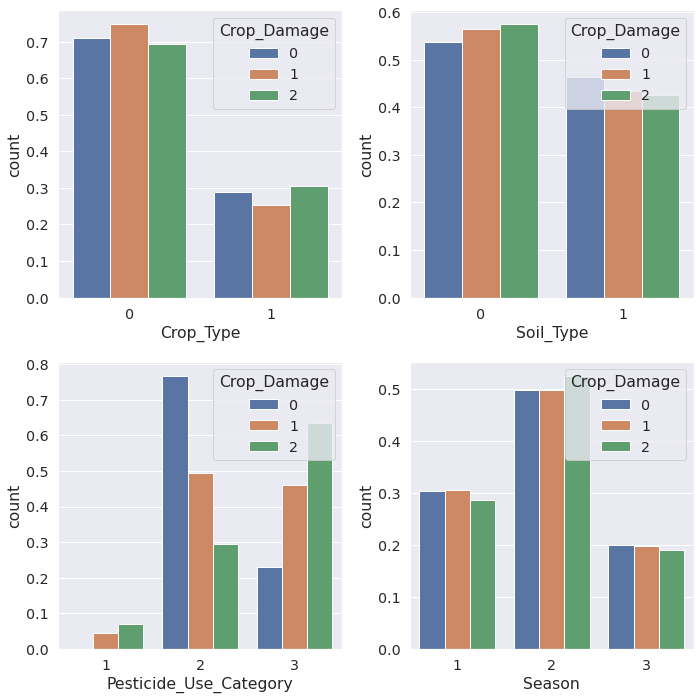

In [ ]:
#fig, axes = plt.subplots(2,2,figsize=(10,10))
#axes = [ax for axes_row in axes for ax in axes_row]

plt.figure(figsize=(10,10))

for i, c in enumerate(cat_cols): 
    plt.subplot(2,2,i+1)
    fltr0 = train['Crop_Damage'] == 0
    fltr1 = train['Crop_Damage'] == 1
    fltr2 = train['Crop_Damage'] == 2
    
    vc_0 = train[fltr0][c].value_counts(normalize=True).reset_index().rename({'index': c, c: 'count'}, axis=1)
    vc_1 = train[fltr1][c].value_counts(normalize=True).reset_index().rename({'index': c, c: 'count'}, axis=1)
    vc_2 = train[fltr2][c].value_counts(normalize=True).reset_index().rename({'index': c, c: 'count'}, axis=1)

    vc_0['Crop_Damage'] = 0
    vc_1['Crop_Damage'] = 1
    vc_2['Crop_Damage'] = 2
    
    df = pd.concat([vc_0, vc_1, vc_2]).reset_index(drop = True) 
    #print(df)
    sns.barplot(x=c, y='count', data=df, hue='Crop_Damage')#, ax=axes[i]) 

plt.tight_layout() 

**Inference:** Crop_Type, Soil_Type, Season don't make such difference; except Pesticide_Use_Category

In [ ]:
'''#axes = [ax for axes_row in axes for ax in axes_row]
#plt.subplots(2,2,figsize=(10,10))

for i, c in enumerate(train[cat_cols]): 
    fltr0 = train['Crop_Damage'] == 0
    fltr1 = train['Crop_Damage'] == 1
    fltr2 = train['Crop_Damage'] == 2
    
    vc_0 = train[fltr0][c].value_counts(normalize=True).reset_index().rename({'index': c, c: 'count'}, axis=1)
    vc_1 = train[fltr1][c].value_counts(normalize=True).reset_index().rename({'index': c, c: 'count'}, axis=1)
    vc_2 = train[fltr2][c].value_counts(normalize=True).reset_index().rename({'index': c, c: 'count'}, axis=1)

    vc_0['Crop_Damage'] = 0
    vc_1['Crop_Damage'] = 1
    vc_2['Crop_Damage'] = 2
    
    #plt.subplot(2,2,i+1)
    df = pd.concat([vc_0, vc_1, vc_2]).reset_index(drop = True) 
    #print(df)
    sns.catplot(x=c, y='count', data=df, hue='Crop_Damage') 

plt.tight_layout() '''

"#axes = [ax for axes_row in axes for ax in axes_row]\n#plt.subplots(2,2,figsize=(10,10))\n\nfor i, c in enumerate(train[cat_cols]): \n    fltr0 = train['Crop_Damage'] == 0\n    fltr1 = train['Crop_Damage'] == 1\n    fltr2 = train['Crop_Damage'] == 2\n    \n    vc_0 = train[fltr0][c].value_counts(normalize=True).reset_index().rename({'index': c, c: 'count'}, axis=1)\n    vc_1 = train[fltr1][c].value_counts(normalize=True).reset_index().rename({'index': c, c: 'count'}, axis=1)\n    vc_2 = train[fltr2][c].value_counts(normalize=True).reset_index().rename({'index': c, c: 'count'}, axis=1)\n\n    vc_0['Crop_Damage'] = 0\n    vc_1['Crop_Damage'] = 1\n    vc_2['Crop_Damage'] = 2\n    \n    #plt.subplot(2,2,i+1)\n    df = pd.concat([vc_0, vc_1, vc_2]).reset_index(drop = True) \n    #print(df)\n    sns.catplot(x=c, y='count', data=df, hue='Crop_Damage') \n\nplt.tight_layout() "

###Dealing with Numerical data

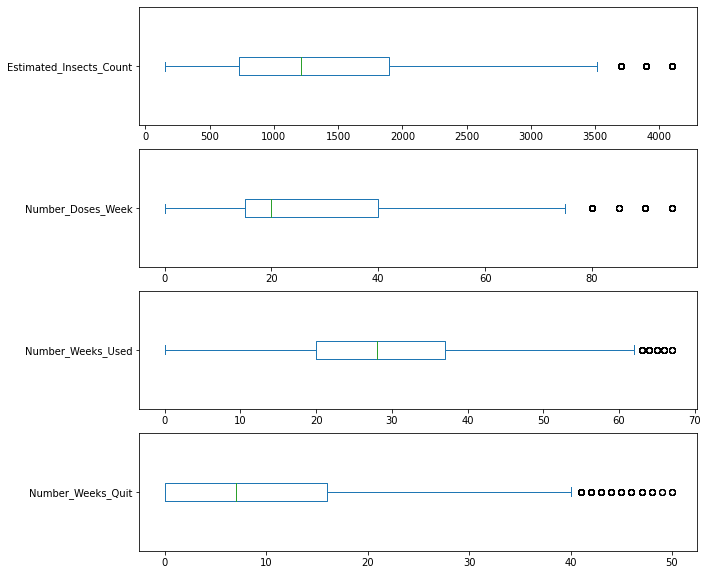

In [ ]:
for i,col in enumerate(num_cols):
     plt.subplot(4,1,i+1)
     train[col].plot(kind='box', figsize=(10,10), vert=False)
     #plt.title(col)

In [ ]:
'''for i,col in enumerate(num_cols):
     plt.subplot(2,2,i+1)
     train[col].plot(kind='hist', figsize=(15,15))
     plt.title(col)'''

"for i,col in enumerate(num_cols):\n     plt.subplot(2,2,i+1)\n     train[col].plot(kind='hist', figsize=(15,15))\n     plt.title(col)"

###Bivariate Analysis - Numerical datatypes

<Figure size 864x864 with 0 Axes>

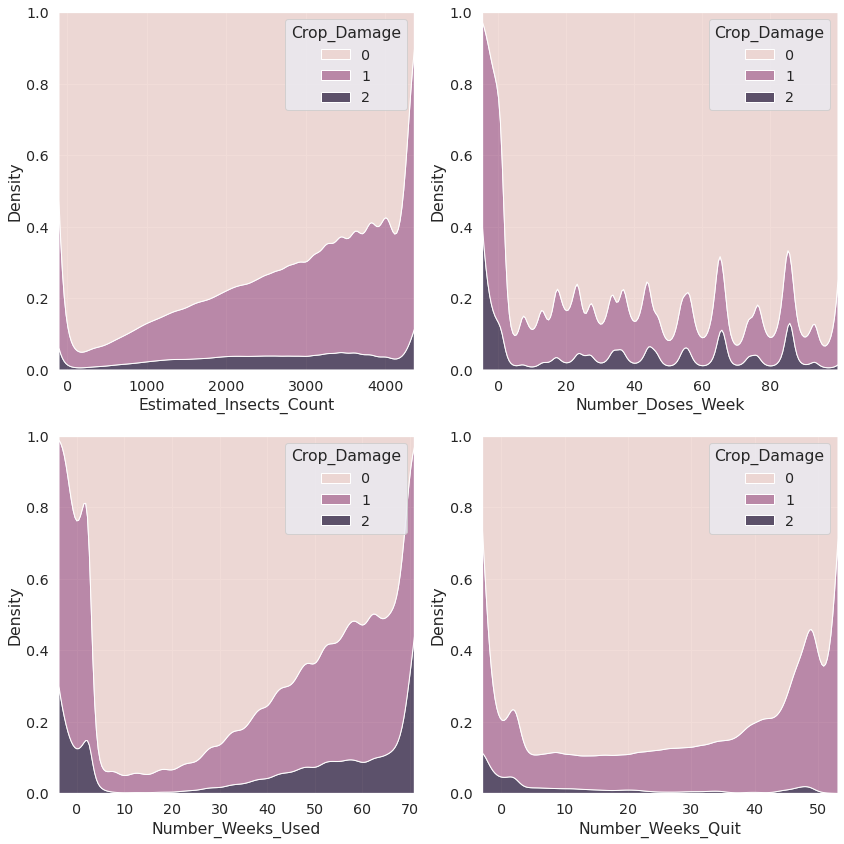

In [ ]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1.3)

for i,col in enumerate(num_cols): 
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=train, x=col, hue='Crop_Damage', multiple='fill')

plt.tight_layout()
plt.show()
# Crop_Damage 0=alive, 1=damage due to other causes, 2=damage due to pesticides

###Bivariate Anaylysis - Median
Due to many outliers, we also look at *Median* value

In [ ]:
for i,col in enumerate(num_cols): 
    print(train.groupby('Crop_Damage')[col].median())
# Crop_Damage 0=alive, 1=damage due to other causes, 2=damage due to pesticides

Crop_Damage
0    1132.0
1    1678.0
2    1576.0
Name: Estimated_Insects_Count, dtype: float64
Crop_Damage
0    20.0
1    20.0
2    20.0
Name: Number_Doses_Week, dtype: float64
Crop_Damage
0    26.0
1    36.0
2    40.0
Name: Number_Weeks_Used, dtype: float64
Crop_Damage
0    8.0
1    0.0
2    0.0
Name: Number_Weeks_Quit, dtype: float64


In [ ]:
#train.groupby?

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Estimated_Insects_Count')

Text(0.5, 1.0, 'Number_Doses_Week')

Text(0.5, 1.0, 'Number_Weeks_Used')

Text(0.5, 1.0, 'Number_Weeks_Quit')

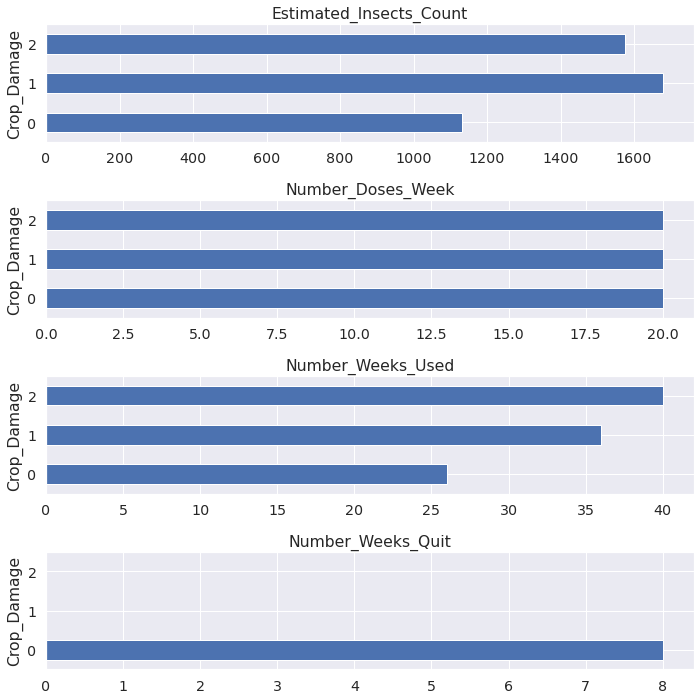

In [ ]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.3)

for i,col in enumerate(num_cols): 
    plt.subplot(4,1,i+1)
    train.groupby('Crop_Damage')[col].median().plot(kind='barh')
    plt.title(col)

plt.tight_layout()
# Crop_Damage 0=alive, 1=damage due to other causes, 2=damage due to pesticides

### Heatmap

<Figure size 1008x576 with 0 Axes>

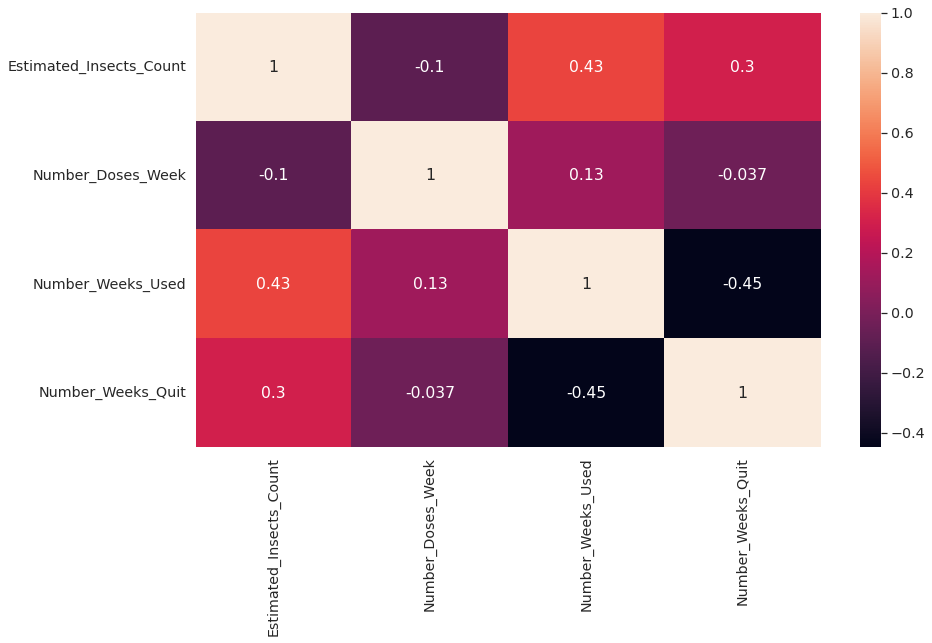

In [ ]:
plt.figure(figsize=(14,8)) 
sns.heatmap(train[num_cols].corr(), annot=True)
plt.show()

Correlation between Number_Weeks_Quit, Number_Weeks_Used, Number_Weeks_Used and Estimated_Insects_Count, Number_Weeks_Quit and Estimated_Insects_Count

# Metrics

##Baseline model

###Helper function

In [ ]:
def download_preds(preds_test, file_name = 'submission.csv'): 
    
    submission['Crop_Damage'] = preds_test 
    
    submission.to_csv(file_name, index=False) 
    
    from google.colab import files 
    files.download(file_name)


### Model A (Predicting all instances as 0 based on Target Distribution)

In [ ]:
#0=alive, 1=damage due to other causes, 2=damage due to pesticides
train['Crop_Damage'].value_counts(normalize=True)

0    0.835468
1    0.138502
2    0.026030
Name: Crop_Damage, dtype: float64

In [ ]:
y_pred = np.zeros(len(train))
y_test = train['Crop_Damage']

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')

print(f'Accuracy score: {accuracy}')
print(f'F1 score: {f1}')

Accuracy score: 0.8354678250692116
F1 score: 0.8354678250692116


In [ ]:
y_pred_test = np.zeros(len(test))

In [ ]:
#download_preds(y_pred_test)

### Model B - Random predictions

In [ ]:
np.random.seed(1)

y_pred = np.random.choice([0,1,2], size=len(train)) 
f1_score(y_test, y_pred, average='micro')

0.33567039546242317

In [ ]:
np.random.seed(1)

y_pred_test = np.random.choice([0,1,2], size=len(test)) 
#download_preds(y_pred_test)

## Classifying based on important features

In [ ]:
def rule_based_clf(df): 
    pred = np.ones(len(df)) 
    rule #boolean_mask 
    pred[rule] = 0 
    return pred

In [ ]:
#y_pred = rule_based_clf(train)
#f1_score(y_test, y_pred)

##Preprocessing Data

### 1. Concat data

In [ ]:
df = pd.concat([train, test]).reset_index(drop=True)
df.shape

(148168, 10)

### 2. One Hot Encoding
Though keep an eye on number of features formed post that; shouldn't be too large (unnecessary in our case as Catgorical vales already numerical)

In [ ]:
print('columns in df: {} \nno. of categorical columns: {} \ntotal no. of unique values: {}'.format(df.shape[1], len(cat_cols), sum(list(map(lambda x: df[x].nunique(),cat_cols)))))

columns in df: 10 
no. of categorical columns: 4 
total no. of unique values: 10


In [ ]:
df = pd.get_dummies(df, columns=cat_cols)

In [ ]:
#pd.get_dummies?

In [ ]:
df.shape[1] # 10 + 10 - 4

16

In [ ]:
df.shape

(148168, 16)

### 3. Fill null values 
We fill we large negative random value like -999 so that it remains on outlier; we could also drop such columns or give other values like mean, median

In [ ]:
# percentage of null values in each column
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Crop_Damage                40.028886
Number_Weeks_Used          10.051428
ID                         0.000000 
Estimated_Insects_Count    0.000000 
Crop_Type                  0.000000 
Soil_Type                  0.000000 
Pesticide_Use_Category     0.000000 
Number_Doses_Week          0.000000 
Number_Weeks_Quit          0.000000 
Season                     0.000000 
dtype: float64

In [ ]:
df.fillna(-999, inplace=True)
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

### 4. Split dataset into train and test data

In [ ]:
df.shape

(148168, 16)

In [ ]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:]
features = [col for col in train_proc.columns if col not in ['ID','Crop_Damage']]

In [ ]:
train_proc.shape, test_proc.shape

((88858, 16), (59310, 16))

### 5. Split train into train and val data

**Stratified Sampling** is necessary, since dataset is highly imbalanced. It ensures that the minority class is distributed proportionally among the two classes.

In [ ]:
X = train_proc[features]
y = train_proc['Crop_Damage']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)
X_test = test_proc[features]

## 6. Fit classification model on train, check on val data

#### 6A. Logistic Regression
need to normalise data

In [ ]:
X_train.shape

(71086, 14)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

StandardScaler()

In [ ]:
X_train.shape

(71086, 14)

In [ ]:
clf = LogisticRegression(random_state = 7) 
clf.fit(X_train, y_train.astype('int'))

LogisticRegression(random_state=7)

In [ ]:
y_pred = clf.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='micro')

print(f'Accuracy score: {accuracy}')
print(f'F1 score: {f1}')

Accuracy score: 0.838116137744767
F1 score: 0.838116137744767


In [ ]:
y_val[y_val>1].shape

(454,)

In [ ]:
y_pred[y_pred>1].shape

(0,)

In [ ]:
y_pred_test = clf.predict(X_test)
#download_preds(y_pred_test)

#### 6B. Decision Tree
Don't require data to be normalised

In [ ]:
clf = DecisionTreeClassifier(random_state = 7)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

DecisionTreeClassifier(random_state=7)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='micro')

print(f'Accuracy score: {accuracy}')
print(f'F1 score: {f1}')

Accuracy score: 0.7519693900517668
F1 score: 0.7519693900517668


In [ ]:
y_pred_test = clf.predict(X_test)
#download_preds(y_pred_test)

## Hyperparameter Tuning

In our decision tree model earlier, we did not change any of the parameters that were input to our model. However hyper-parameters and their values vary from dataset to dataset, and their optimal values have a large impact on the performance of our model.

To perform hyperparameter-tuning we specify a list of hyper-parameters to tune and their possible values.

For example:

max_depth in decision trees: [6, 9, 12, 15]
learning_rate in NN: [0.0001, 0.005, 0.01, 0.05]
etc.

### 1. Grid Search
try all possible combinations of hyperparameter values by trial and error

### 2. Random Search: 
run model fixed number of times, say 10, and return best hyper-parameter combination; saves more time

#### Decision Tree

In [ ]:
#check parameters
#DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1, 2: 1}, {0: 1, 1: 2, 2: 2}, {0: 1, 1: 3, 2: 3}, {0: 1, 1: 4, 2: 4}, {0: 1, 1: 5, 2: 5}]
}

clf = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='accuracy',
                         random_state=1,
                         n_iter=50)

search = clf.fit(X, y)

search.best_params_

{'class_weight': {0: 1, 1: 1, 2: 1},
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 0.8,
 'max_leaf_nodes': 128,
 'min_samples_split': 2}

In [ ]:
optimal_params = {'class_weight': {0: 1, 1: 1, 2: 1},
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 0.8,
 'max_leaf_nodes': 128,
 'min_samples_split': 2}

clf = DecisionTreeClassifier(random_state = 1, **optimal_params)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

DecisionTreeClassifier(class_weight={0: 1, 1: 1, 2: 1}, criterion='entropy',
                       max_depth=10, max_features=0.8, max_leaf_nodes=128,
                       random_state=1)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='micro')

print(f'Accuracy score: {accuracy}')
print(f'F1 score: {f1}')

Accuracy score: 0.8427864055818141
F1 score: 0.8427864055818141


In [ ]:
y_pred_test = clf.predict(X_test)
#download_preds(y_pred_test)

#### Logistic Regression

In [ ]:
1e-2

0.01

In [ ]:
LogisticRegression?

In [ ]:
hyperparam_combs = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'tol' : [0.08, 0.06, 0.05, 0.04, 0.02],
    'C' : [1, 2, 3, 4, 5],
    'class_weight' : [{0: 1, 1: 1, 2: 1}, {0: 1, 1: 1, 2: 2}, {0: 1, 1: 2, 2: 1}, {0: 1, 1: 1, 2: 3}],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

clf = RandomizedSearchCV(LogisticRegression(),
                         hyperparam_combs,
                         scoring='accuracy',
                         random_state=7,
                         n_iter=15)

search = clf.fit(X_train, y_train)

search.best_params_

{'C': 4,
 'class_weight': {0: 1, 1: 1, 2: 1},
 'penalty': 'l1',
 'solver': 'saga',
 'tol': 0.08}

In [ ]:
optimal_params = {'C': 4,
 'class_weight': {0: 1, 1: 1, 2: 1},
 'penalty': 'l1',
 'solver': 'saga',
 'tol': 0.08}

clf = LogisticRegression(random_state = 7, **optimal_params) 
clf.fit(X_train, y_train.astype('int'))

y_pred = clf.predict(X_val)

LogisticRegression(C=4, class_weight={0: 1, 1: 1, 2: 1}, penalty='l1',
                   random_state=7, solver='saga', tol=0.08)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='micro')

print(f'Accuracy score: {accuracy}')
print(f'F1 score: {f1}')

Accuracy score: 0.8383412108935404
F1 score: 0.8383412108935404


In [ ]:
y_pred[y_pred>1].shape

(0,)

In [ ]:
y_pred_test = clf.predict(X_test)
#download_preds(y_pred_test)

## Validation Strategy:

### Stratified K-Fold Validation
Use this instead of regular K-Fold Cross Validation as dataset target values skewed

In [ ]:
X = train_proc[features]
y = train_proc['Crop_Damage']

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5

  oofs = np.zeros(len(train))
  preds = np.zeros((len(test),3))

  folds = StratifiedKFold(n_splits = N_SPLITS)

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train['Crop_Damage'])):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], train['Crop_Damage'].iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], train['Crop_Damage'].iloc[val_idx]

    ### Test Set
    X_test = test[features]

    ############# Scaling Data ################
    scaler = StandardScaler()
    scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)


    ############# Fitting and Predicting ################

    clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    
    #print(clf.predict(X_val).shape, clf.predict_proba(X_val).shape, clf.predict_proba(X_val)[:, 1].shape)
    #(17772,) (17772, 3) (17772,)
    #print(clf.predict(X_val)[:3])
    #print(clf.predict_proba(X_val)[:3,1])
    
    preds_val = clf.predict(X_val)
    #preds_test = clf.predict(X_test)
    #preds_val = clf.predict_proba(X_val)[:, 1]
    preds_test = clf.predict_proba(X_test)

    #accuracy = accuracy_score(y_val, preds_val.round())
    accuracy = accuracy_score(y_val, preds_val)
    print(f'\nAccuracy score for validation set is {accuracy}')

    oofs[val_idx] = preds_val # predictions, not probabilit
    preds += preds_test / N_SPLITS


  #oofs_score = accuracy_score(y, oofs.round())
  preds = np.argmax(preds, axis=1)
  oofs_score = accuracy_score(y, oofs)
  print(f'\n\nAccuracy score for oofs is {oofs_score}')

  return oofs, preds

In [ ]:
a = np.arange(6).reshape(3,2)
print(a)
np.argmax(a, axis=1)

[[0 1]
 [2 3]
 [4 5]]


array([1, 1, 1])

In [ ]:
#clf.predict_proba?
#round?

###KFold on Decision Tree

In [ ]:
dt_params = {'class_weight': {0: 1, 1: 1, 2: 1},
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.4,
 'max_leaf_nodes': 16,
 'min_samples_split': 2}

clf = DecisionTreeClassifier(**dt_params)

dt_oofs, dt_preds = run_clf_kfold(clf, train_proc, test_proc, features)


------------- Fold 1 -------------

Accuracy score for validation set is 0.8406482106684673

------------- Fold 2 -------------

Accuracy score for validation set is 0.8409858203916273

------------- Fold 3 -------------

Accuracy score for validation set is 0.8398604546477605

------------- Fold 4 -------------

Accuracy score for validation set is 0.8404704293511901

------------- Fold 5 -------------

Accuracy score for validation set is 0.8399077148162737


Accuracy score for oofs is 0.8403745301492268


In [ ]:
dt_preds_rounded = dt_preds.round()
#download_preds(y_pred_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Gradient Boosting

### 1. LightGBM

In [ ]:
clf = LGBMClassifier()
lgb_oofs, lgb_preds = run_clf_kfold(clf, train_proc, test_proc, features)


------------- Fold 1 -------------

Accuracy score for validation set is 0.8446995273463875

------------- Fold 2 -------------

Accuracy score for validation set is 0.8443619176232275

------------- Fold 3 -------------

Accuracy score for validation set is 0.8419986495611074

------------- Fold 4 -------------

Accuracy score for validation set is 0.8434528163862473

------------- Fold 5 -------------

Accuracy score for validation set is 0.8440718023746553


Accuracy score for oofs is 0.8437169416372189


In [ ]:
dt_preds_rounded = dt_preds.round()
#download_preds(y_pred_test)

## Hacking Accuracy or Threshold optimization

Rounding off means you are selecting a threshold of 0.5. Any predictions with probabilities greater than or equal to 0.5 will be rounded to 1, rest will be rounded to 0.
### ***This happens in the case of oofs.round() in our run_clf_kfold function***

But is 0.5 the best threshold to get an optimal Accuracy score ?

Lets verify it ourselves by running all threholds from 0.01,0.02 to 0.99.

In [ ]:
lgb_oofs[lgb_oofs > 1]

array([], dtype=float64)

In [ ]:
thresholds = np.arange(0, 100)/100
for thresh in thresholds:
  oofs_rounded = (lgb_oofs > thresh) * 1 # lgb_oofs from run_clf_kfold for LGBM
  thresh_score = accuracy_score(y, oofs_rounded)
  print(f'Threshold {thresh}: {thresh_score}')

Threshold 0.0: 0.13850187940309258
Threshold 0.01: 0.16881991492043485
Threshold 0.02: 0.22723896554052533
Threshold 0.03: 0.3050147426230615
Threshold 0.04: 0.3724256679196021
Threshold 0.05: 0.43042832384253527
Threshold 0.06: 0.4822075671295775
Threshold 0.07: 0.5233743725944766
Threshold 0.08: 0.5579238785477953
Threshold 0.09: 0.5899975241396386
Threshold 0.1: 0.6192689459587206
Threshold 0.11: 0.644421436449166
Threshold 0.12: 0.6673343987035495
Threshold 0.13: 0.6871300276846204
Threshold 0.14: 0.7053050935199981
Threshold 0.15: 0.7207229512255509
Threshold 0.16: 0.7348241013752279
Threshold 0.17: 0.7471358797182021
Threshold 0.18: 0.7582547435233744
Threshold 0.19: 0.7688221657025817
Threshold 0.2: 0.7777465169146278
Threshold 0.21: 0.7868171689662158
Threshold 0.22: 0.7942560039613766
Threshold 0.23: 0.8005694478831394
Threshold 0.24: 0.8059713250354498
Threshold 0.25: 0.8113619482770262
Threshold 0.26: 0.8165612550361251
Threshold 0.27: 0.8210403115082491
Threshold 0.28: 0.82

### note this outputs only 0,1 not 0,1,2, as needed

In [ ]:
def get_optimal_accuracy_thresh(target, oofs):
  thresholds = np.arange(0, 100)/100
  thresh_scores = []
  for thresh in thresholds:
    oofs_rounded = (lgb_oofs > thresh) * 1
    thresh_score = accuracy_score(target, oofs_rounded)
    thresh_scores.append(thresh_score)
  
  all_thresholds_and_scores = pd.Series(index = thresholds, data = thresh_scores)
  all_thresholds_and_scores.plot(figsize=(10, 6), fontsize=14)
  
  plt.xlabel('Threshold', fontsize=14)
  plt.ylabel('F1 Score', fontsize=14)

  return all_thresholds_and_scores.sort_values(ascending=False).index.values[0]

Optimal threhold is 0.44


0.8465304193207139

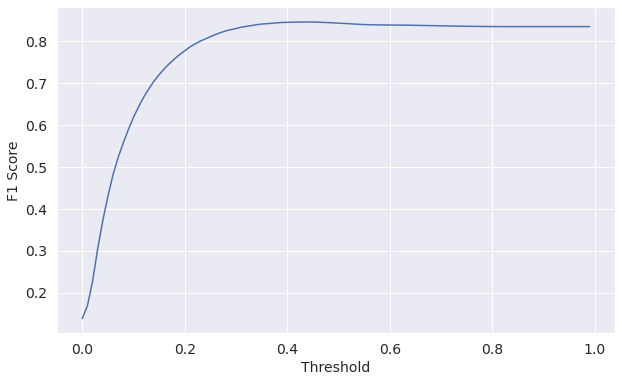

In [ ]:
optimal_thresh = get_optimal_accuracy_thresh(y, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
accuracy_score(y, (lgb_oofs > optimal_thresh) * 1)

In [ ]:
TARGET_COL = 'Crop_Damage'
target = y

## **Tuning LightGBM**

* Early Stopping: Stopping the model training, when the model starts to overfit
  * How do we know if model is overfitting ?
* HyperParameter Optimization.
  * Is random search the best way to go ?

**Simple Function to Run Gradient Boosting**

Let's make a simple function to call gradient boosting and get our oofs and predictions. Rather than copying and pasting the same code again and again/

In [ ]:
def run_gradient_boosting(clf, fit_params, train, test, features):
  N_SPLITS = 5
  oofs = np.zeros(len(train_proc))
  preds = np.zeros((len(test_proc)))

  folds = StratifiedKFold(n_splits = N_SPLITS)

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[TARGET_COL])):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict_proba(X_val)[:, 1]
    preds_test = clf.predict_proba(X_test)[:, 1]

    fold_score = accuracy_score(y_val, preds_val.round())
    print(f'\nAccuracy_score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = accuracy_score(target, oofs.round())
  print(f'\n\nAccuracy_score for oofs is {oofs_score}')

  return oofs, preds

**Manual Tuning. Choosing Hyperparameters to Tune**


------------- Fold 1 -------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's multi_logloss: 0.416405
[200]	valid_0's multi_logloss: 0.415884
Early stopping, best iteration is:
[196]	valid_0's multi_logloss: 0.415833

Accuracy_score for validation set is 0.8437992347512941

------------- Fold 2 -------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's multi_logloss: 0.420959
[200]	valid_0's multi_logloss: 0.420097
[300]	valid_0's multi_logloss: 0.420151
Early stopping, best iteration is:
[245]	valid_0's multi_logloss: 0.419994

Accuracy_score for validation set is 0.8441368444744543

------------- Fold 3 -------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's multi_logloss: 0.419499
[200]	valid_0's multi_logloss: 0.418721
[300]	valid_0's multi_logloss: 0.419225
Early stopping, best iteration is:
[208]	valid_0's multi_logloss: 0.418701

Accuracy_score for validation set is 0.8423

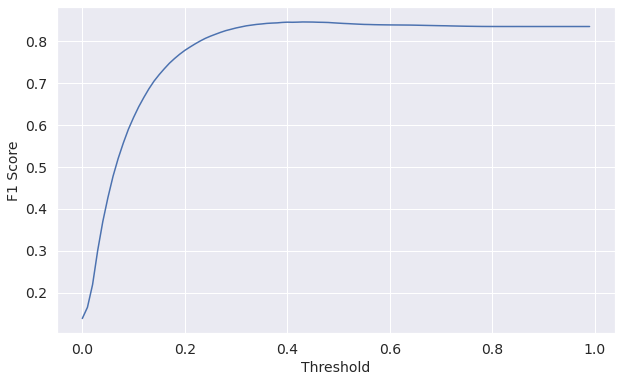

In [ ]:
clf = LGBMClassifier(n_estimators = 1000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.76,
                        )
fit_params = {'verbose': 100, 'early_stopping_rounds': 100}

lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_accuracy_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = accuracy_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

**Submitting on the Leaderboard**

In [ ]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1
#download_preds(y_pred_test)

**Tuning Learning Rate**

In [ ]:
LGBMClassifier?


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.426814
[400]	valid_0's multi_logloss: 0.417903
[600]	valid_0's multi_logloss: 0.416267
[800]	valid_0's multi_logloss: 0.41605
[1000]	valid_0's multi_logloss: 0.415981
[1200]	valid_0's multi_logloss: 0.416035
Early stopping, best iteration is:
[1122]	valid_0's multi_logloss: 0.415976

Accuracy_score for validation set is 0.8435741616025209

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.430315
[400]	valid_0's multi_logloss: 0.42211
[600]	valid_0's multi_logloss: 0.420501
[800]	valid_0's multi_logloss: 0.42006
[1000]	valid_0's multi_logloss: 0.419872
Early stopping, best iteration is:
[982]	valid_0's multi_logloss: 0.419859

Accuracy_score for validation set is 0.8441368444744543

------------- Fold 3 -------------
Training until validation scores don't improve for 200 rounds

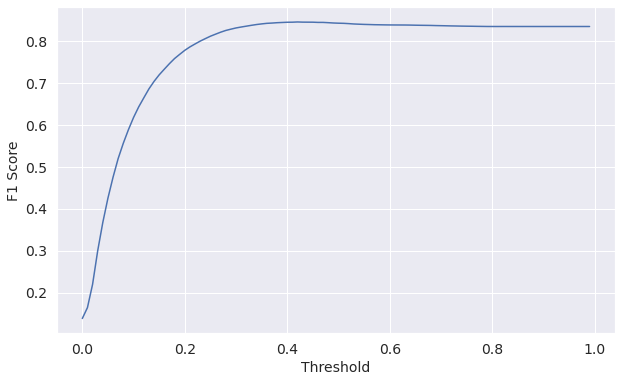

In [ ]:
clf = LGBMClassifier(n_estimators = 2000,
                     learning_rate = 0.01,
                     colsample_bytree = 0.65,
                     random_state = 2)
fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_accuracy_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = accuracy_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

**Submitting on the Leaderboard**

In [ ]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1
#download_preds(lgb_preds_rounded, file_name = 'hacklive_lgb_5_folds_learning_rate_tuned.csv')

Enough of LightGBM, lets now look at other libraries

## **CatBoost**

CatBoost is a high-performance open source library for gradient boosting on decision trees.

Features

* Great quality without parameter tuning: Reduce time spent on parameter tuning, because CatBoost provides great results with default parameters

* Categorical features support: Improve your training results with CatBoost that allows you to use non-numeric factors, instead of having to pre-process your data or spend time and effort turning it to numbers.

* Fast and scalable GPU version: Train your model on a fast implementation of gradient-boosting algorithm for GPU. Use a multi-card configuration for large datasets.

* Improved accuracy: Reduce overfitting when constructing your models with a novel gradient-boosting scheme.

* Fast prediction: Apply your trained model quickly and efficiently even to latency-critical tasks using CatBoost's model applier

https://catboost.ai/


------------- Fold 1 -------------
0:	learn: 1.0385034	test: 1.0382073	best: 1.0382073 (0)	total: 80.1ms	remaining: 4m
200:	learn: 0.4211896	test: 0.4219296	best: 0.4219296 (200)	total: 6.09s	remaining: 1m 24s
400:	learn: 0.4137927	test: 0.4182765	best: 0.4182765 (400)	total: 12.1s	remaining: 1m 18s
600:	learn: 0.4091738	test: 0.4172550	best: 0.4172307 (593)	total: 18s	remaining: 1m 11s
800:	learn: 0.4054845	test: 0.4167726	best: 0.4167448 (793)	total: 24s	remaining: 1m 5s
1000:	learn: 0.4019316	test: 0.4165517	best: 0.4165511 (999)	total: 30s	remaining: 59.8s
1200:	learn: 0.3989680	test: 0.4165770	best: 0.4164997 (1048)	total: 35.9s	remaining: 53.8s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.4164997256
bestIteration = 1048

Shrink model to first 1049 iterations.

Accuracy_score for validation set is 0.8440805761872608

------------- Fold 2 -------------
0:	learn: 1.0384548	test: 1.0383885	best: 1.0383885 (0)	total: 32.7ms	remaining: 1m 38s
200:	learn: 0.4202

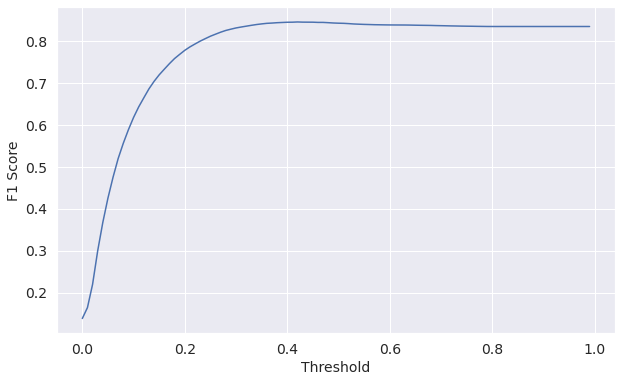

In [ ]:
clf = CatBoostClassifier(n_estimators = 3000,
                       learning_rate = 0.05,
                       rsm = 0.4, ## Analogous to colsample_bytree
                       random_state=2054,
                       )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

cb_oofs, cb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_accuracy_thresh(target, cb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = accuracy_score(target, (cb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

**Submitting on the Leaderboard**

In [ ]:
cb_preds_rounded = (cb_preds > optimal_thresh) * 1
download_preds(cb_preds_rounded)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**CatBoost: gives Improvement from 0.6585 to 0.6620 on LB**.

* Is catboost better then LightGBM ?
* Can catboost score be further improved ?
* Can LighGBM be tuned to give a better score than CatBoost ?

## **XGBoost**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

https://xgboost.readthedocs.io/en/latest/


------------- Fold 1 -------------
[0]	validation_0-merror:0.159408
Will train until validation_0-merror hasn't improved in 200 rounds.
[200]	validation_0-merror:0.153387
[400]	validation_0-merror:0.151868
[600]	validation_0-merror:0.15108
[800]	validation_0-merror:0.151474
Stopping. Best iteration:
[602]	validation_0-merror:0.150968


Accuracy_score for validation set is 0.8443619176232275

------------- Fold 2 -------------
[0]	validation_0-merror:0.156144
Will train until validation_0-merror hasn't improved in 200 rounds.
[200]	validation_0-merror:0.153275
[400]	validation_0-merror:0.152543
Stopping. Best iteration:
[365]	validation_0-merror:0.152262


Accuracy_score for validation set is 0.8437429664641009

------------- Fold 3 -------------
[0]	validation_0-merror:0.158395
Will train until validation_0-merror hasn't improved in 200 rounds.
[200]	validation_0-merror:0.154907
[400]	validation_0-merror:0.155357
Stopping. Best iteration:
[211]	validation_0-merror:0.154625


Accuracy_

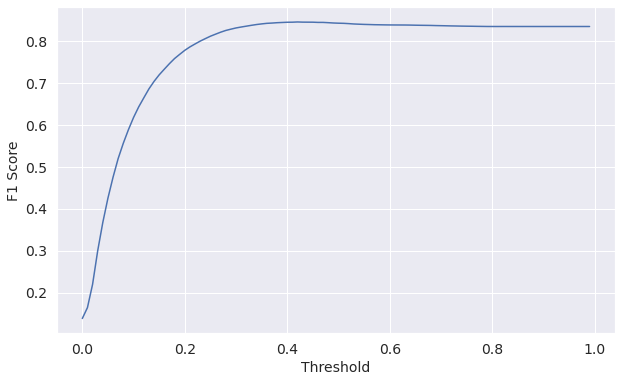

In [ ]:
clf = XGBClassifier(n_estimators = 1000,
                    max_depth = 6,
                    learning_rate = 0.05,
                    colsample_bytree = 0.5,
                    random_state=1452,
                    )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

xgb_oofs, xgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_accuracy_thresh(target, xgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = accuracy_score(target, (xgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

**Submitting on the Leaderboard**

In [ ]:
xgb_preds_rounded = (xgb_preds > optimal_thresh) * 1
#download_preds(xgb_preds_rounded, file_name = 'hacklive_xgbb_5_folds.csv')

**Questions to think about XGBoost**

* Is XGBoost worse than LightGBM and CatBoost ?

* Can XGBoost be tuned more ?



# **Feature Engineering**

* What does a model know about a sample ?

* What the model does not know about the sample ?

* How do we provide that unknown information to the model ?


***Feature Engineering is one of the biggest difference maker in any ML competition.*** 

##Helper Functions

In [ ]:
def join_df(train, test):

  df = pd.concat([train, test], axis=0).reset_index(drop = True)
  features = [col for col in df.columns if col not in ['ID','Crop_Damage']]

  return df, features

def split_df_and_get_features(df, train_nrows):

  train, test = df[:train_nrows].reset_index(drop = True), df[train_nrows:].reset_index(drop = True)
  features = [col for col in train.columns if col not in ['ID','Crop_Damage']]
  
  return train, test, features

In [ ]:
df, features = join_df(train, test)

In [ ]:
df.select_dtypes('object').columns.tolist()

['ID']

In [ ]:
df, features = join_df(train, test)

### Label Encoding
df[cat_cols] = df[cat_cols].apply(lambda x: pd.factorize(x)[0])
#### No NaN filling required for gradient boosting

In [ ]:
df.head()

ID  Estimated_Insects_Count  ...  Season  Crop_Damage
0  F00000001  188                      ...  0       0.0        
1  F00000003  209                      ...  1       1.0        
2  F00000004  257                      ...  1       1.0        
3  F00000005  257                      ...  1       1.0        
4  F00000006  342                      ...  1       1.0        

[5 rows x 10 columns]

## **Frequency Features**

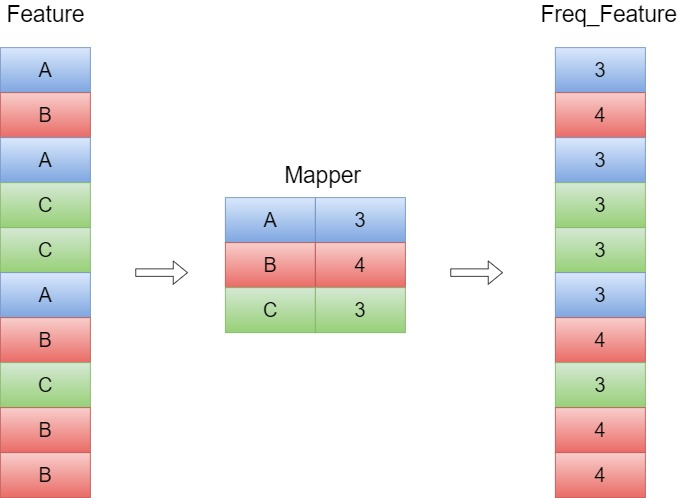

In [ ]:
def get_frequency_features(df, cols):

  df[[c + '_freq' for c in cols]] = df[cols].apply(lambda x: x.map(x.value_counts()))
  
  return df

In [ ]:
freq_cols = [c for c in df.columns if (train[c].nunique() > 10) and (train[c].nunique() < 50)]
freq_cols

['Number_Doses_Week']

In [ ]:
df = get_frequency_features(df, freq_cols)
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.418129
[400]	valid_0's multi_logloss: 0.416862
[600]	valid_0's multi_logloss: 0.417251
Early stopping, best iteration is:
[488]	valid_0's multi_logloss: 0.416748

Accuracy_score for validation set is 0.8430677470177808

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.424108
[400]	valid_0's multi_logloss: 0.422119
[600]	valid_0's multi_logloss: 0.422249
Early stopping, best iteration is:
[468]	valid_0's multi_logloss: 0.421903

Accuracy_score for validation set is 0.8435178933153274

------------- Fold 3 -------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.422037
[400]	valid_0's multi_logloss: 0.421155
[600]	valid_0's multi_logloss: 0.421397
Early stopping, best iteration is:
[471]	valid_0's multi_logloss: 0.420967

Acc

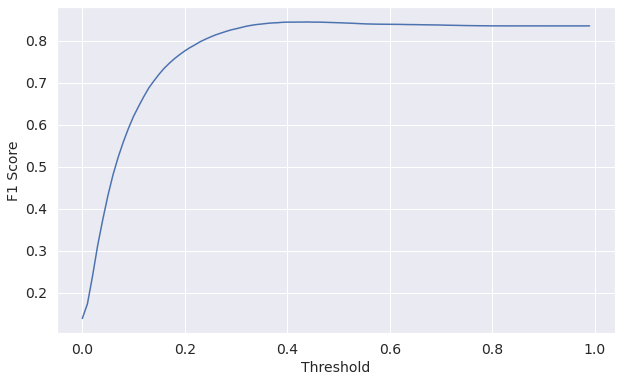

In [ ]:
clf = LGBMClassifier(n_estimators = 2000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.4,
                        reg_alpha = 1,
                        reg_lambda = 1
                        )
fit_params = {'verbose': 200, 'early_stopping_rounds': 200}
lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_accuracy_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = accuracy_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

## **Interaction Features**

Can any two features be combined to make more sense in the given dataset ?

In [ ]:
df = pd.concat([train, test]).reset_index(drop=True)
len(df.columns)

10

In [ ]:
df.fillna(-999, inplace=True)

###Drop Features

In [ ]:
ndf = df.copy()

# Crop_Type, Soil_Type, Season don't make much difference; except Pesticide_Use_Category
ndf.drop(columns=['Crop_Type', 'Soil_Type', 'Season'], inplace=True)
print(ndf.shape)

(148168, 7)


In [ ]:
ntrain, nval = ndf[:train.shape[0]], ndf[train.shape[0]:]
nfeatures = [col for col in ndf.columns if col not in ['ID','Crop_Damage']]
print(ntrain.shape)

(88858, 7)


In [ ]:
optimal_params = {'class_weight': {0: 1, 1: 1, 2: 1},
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 0.8,
 'max_leaf_nodes': 128,
 'min_samples_split': 2}

clf = DecisionTreeClassifier(random_state = 1, **optimal_params)

dt_oofs, dt_preds = run_clf_kfold(clf, ntrain, nval, nfeatures)


------------- Fold 1 -------------

Accuracy score for validation set is 0.8444744541976142

------------- Fold 2 -------------

Accuracy score for validation set is 0.8420549178483007

------------- Fold 3 -------------

Accuracy score for validation set is 0.8443056493360342

------------- Fold 4 -------------

Accuracy score for validation set is 0.843171459118789

------------- Fold 5 -------------

Accuracy score for validation set is 0.8422148444094311


Accuracy score for oofs is 0.8432442773863917


In [ ]:
dt_preds_rounded = dt_preds.round()
#download_preds(y_pred_test)

In [ ]:
#ndf[df['Number_Weeks_Quit']!=0].head(10)
ndf.head(10)

ID  Estimated_Insects_Count  ...  Number_Weeks_Quit  Crop_Damage
0  F00000001  188                      ...  0                  0.0        
1  F00000003  209                      ...  0                  1.0        
2  F00000004  257                      ...  0                  1.0        
3  F00000005  257                      ...  0                  1.0        
4  F00000006  342                      ...  0                  1.0        
5  F00000008  448                      ...  0                  1.0        
6  F00000009  448                      ...  0                  1.0        
7  F00000010  577                      ...  0                  2.0        
8  F00000012  731                      ...  0                  0.0        
9  F00000020  1132                     ...  0                  2.0        

[10 rows x 7 columns]

### Integrate Features

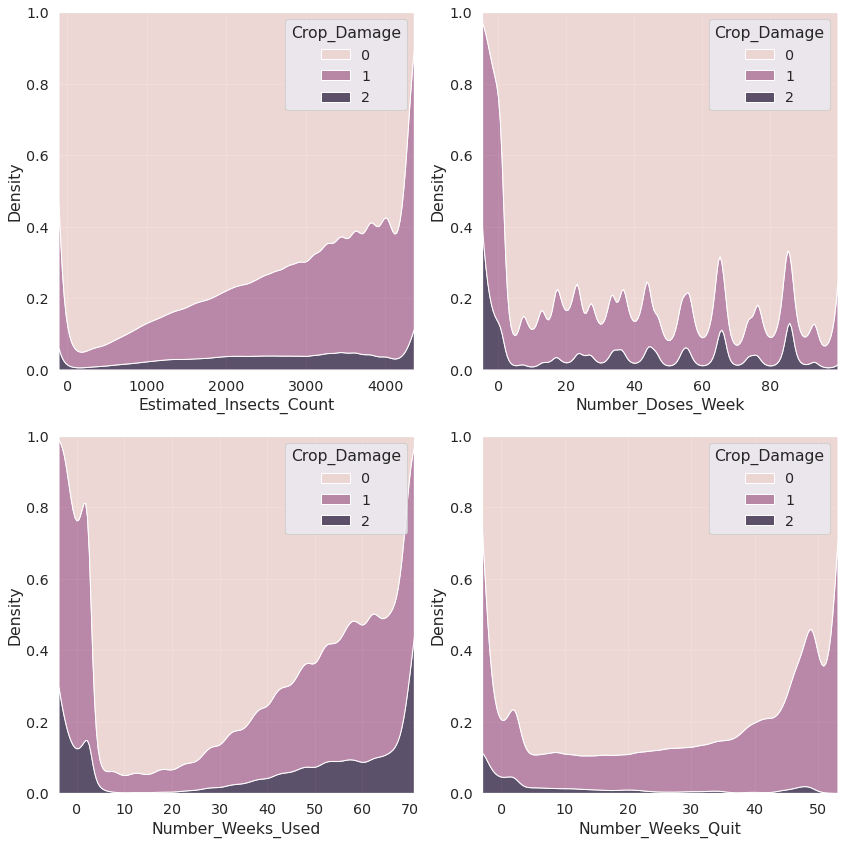

In [ ]:
len(ndf.columns)

7

In [ ]:
# deal with correlation of: 
#   Number_Weeks_Quit and Number_Weeks_Used, (-ve)
#   Number_Weeks_Used and Estimated_Insects_Count, (+ve) -> divide 
#   Number_Weeks_Quit and Estimated_Insects_Count (+ve)

#ndf['Weeks_Considered'] =  ndf['Number_Weeks_Quit'] * ndf['Number_Weeks_Used']
#ndf["Pesticide_Effect"] = ndf["Estimated_Insects_Count"] / ndf["Number_Weeks_Used"]
#ndf["Insect_revival"] = ndf["Estimated_Insects_Count"] / ndf["Number_Weeks_Quit"]
#ndf["Pesticide_Used"] = ndf["Number_Weeks_Used"] * ndf["Number_Doses_Week"]

ndf['Weeks_Considered'] =  ndf['Number_Weeks_Quit'] + ndf['Number_Weeks_Used']
#ndf["Pesticide_Effect"] = ndf["Estimated_Insects_Count"] / ndf["Number_Doses_Week"]
#ndf["Pesticide_Used"] = ndf["Number_Weeks_Used"] / ndf["Number_Doses_Week"]
ndf["Total_dose"] = ndf["Number_Weeks_Used"] * ndf["Number_Doses_Week"]

In [ ]:
len(ndf.columns)

9

In [ ]:
#ndf["Pesticide_Effect"][ndf["Pesticide_Effect"] == np.inf] = -9999
#ndf["Pesticide_Used"][ndf["Pesticide_Used"] == np.inf] = -9999

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#ndf['ID'] = LabelEncoder().fit_transform(ndf['ID'])
#nfeatures = [col for col in ndf.columns if col not in ['Crop_Damage']]

ntrain, nval = ndf[:train.shape[0]], ndf[train.shape[0]:]
nfeatures = [col for col in ndf.columns if col not in ['ID','Crop_Damage']]

In [ ]:
optimal_params = {'class_weight': {0: 1, 1: 1, 2: 1},
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 0.8,
 'max_leaf_nodes': 128,
 'min_samples_split': 2}

clf = DecisionTreeClassifier(random_state = 1, **optimal_params)

dt_oofs, dt_preds = run_clf_kfold(clf, ntrain, nval, nfeatures)


------------- Fold 1 -------------

Accuracy score for validation set is 0.8432928201665542

------------- Fold 2 -------------

Accuracy score for validation set is 0.8440243079000675

------------- Fold 3 -------------

Accuracy score for validation set is 0.8428426738690075

------------- Fold 4 -------------

Accuracy score for validation set is 0.8433965449327556

------------- Fold 5 -------------

Accuracy score for validation set is 0.8441843452816387


Accuracy score for oofs is 0.8435481329762092


In [ ]:
len(dt_preds[dt_preds>0])

In [ ]:
#df[['month', 'day_of_month']].head()

In [ ]:
#df['month_and_day_of_month'] = pd.factorize(df['month'].astype('str') + df['day_of_month'].astype('str'))[0]

In [ ]:
#df['month_and_day_of_month']

In [ ]:
#df['month_and_day_of_month'].nunique()

In [ ]:
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])

In [ ]:
clf = LGBMClassifier(n_estimators = 3000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.38,
                        reg_alpha = 1,
                        reg_lambda = 1,
                        )
fit_params = {'verbose': 200, 'early_stopping_rounds': 400}
lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_accuracy_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = accuracy_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')


------------- Fold 1 -------------
Training until validation scores don't improve for 400 rounds.
[200]	valid_0's multi_logloss: 0.418129
[400]	valid_0's multi_logloss: 0.416862
[600]	valid_0's multi_logloss: 0.417251
[800]	valid_0's multi_logloss: 0.418339
Early stopping, best iteration is:
[488]	valid_0's multi_logloss: 0.416748

Accuracy_score for validation set is 0.8430677470177808

------------- Fold 2 -------------
Training until validation scores don't improve for 400 rounds.
[200]	valid_0's multi_logloss: 0.424108
[400]	valid_0's multi_logloss: 0.422119
[600]	valid_0's multi_logloss: 0.422249
[800]	valid_0's multi_logloss: 0.422899
Early stopping, best iteration is:
[468]	valid_0's multi_logloss: 0.421903

Accuracy_score for validation set is 0.8435178933153274

------------- Fold 3 -------------
Training until validation scores don't improve for 400 rounds.
[200]	valid_0's multi_logloss: 0.422037
[400]	valid_0's multi_logloss: 0.421155
[600]	valid_0's multi_logloss: 0.421397

KeyboardInterrupt: ignored

**EDA and features from EDA**

In [ ]:
#df['month_and_day_of_month'].value_counts()

In [ ]:
#df = get_frequency_features(df, ['month_and_day_of_month'])
#train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])

In [ ]:
#lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1
#download_preds(lgb_preds_rounded, file_name = 'hacklive_lgb_5_folds_fe.csv')

In [ ]:
#train['education'].map({'primary': 1, 'secondary': 2, 'tertiary': 3})

In [ ]:
clf = LGBMClassifier(n_estimators = 3000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.38,
                        reg_alpha = 1,
                        reg_lambda = 1,
                        )
fit_params = {'verbose': 200, 'early_stopping_rounds': 400}
lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_accuracy_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = accuracy_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

In [ ]:
#lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1
#download_preds(lgb_preds_rounded, file_name = 'hacklive_lgb_5_folds_fe_freq.csv')

## **Grouping Features**

In [ ]:
df['mean_age_for_customer_on_month_and_day_of_month'] = df.groupby('month_and_day_of_month')['customer_age'].transform('mean')
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])

In [ ]:
clf = LGBMClassifier(n_estimators = 3000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.38,
                        reg_alpha = 1,
                        reg_lambda = 1,
                        )
fit_params = {'verbose': 200, 'early_stopping_rounds': 400}
lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_accuracy_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = accuracy_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

In [ ]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1
download_preds(lgb_preds_rounded, file_name = 'hacklive_lgb_5_folds_fe_freq_grouped.csv')

# **Ensembling**




In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.



* What are our best performing algorithms ?
* How do we combine these algorithms to get a better performance ?

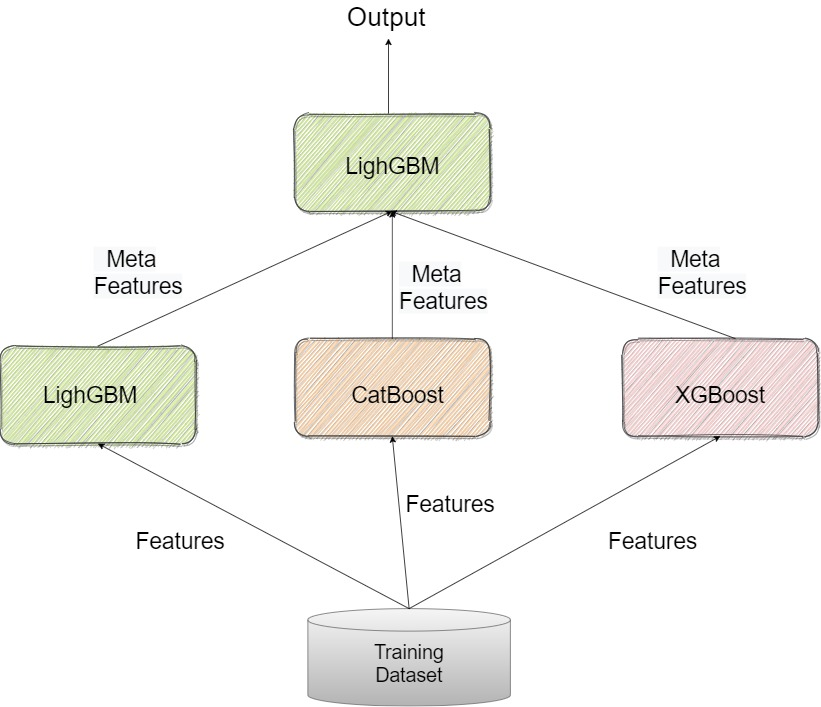

To read more about ensembling go here:

https://bit.ly/2SFgrnb

In [ ]:
train_new = train[[ID_COL, TARGET_COL]]
test_new = test[[ID_COL]]

train_new['lgb'] = lgb_oofs
test_new['lgb'] = lgb_preds

train_new['cb'] = cb_oofs
test_new['cb'] = cb_preds

train_new['xgb'] = xgb_oofs
test_new['xgb'] = xgb_preds

features = [c for c in train_new.columns if c not in [ID_COL, TARGET_COL]]

In [ ]:
features

In [ ]:
clf = LGBMClassifier(n_estimators = 2000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.75,
                        reg_alpha=1,
                        reg_lambda=1,
                        )
fit_params = {'verbose': 200, 'early_stopping_rounds': 200}
lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_new, test_new, features)

optimal_thresh = get_optimal_accuracy_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = accuracy_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

In [ ]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1
download_preds(lgb_preds_rounded, file_name = 'hacklive_stacked.csv')

# **Making Our Final Submission**

In [ ]:
?pd.get_dummies

In [ ]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1
download_preds(lgb_preds_rounded, file_name = 'hacklive_5_folds_ensemble.csv')

# **How should we select our Final Submission ?**

* Best CV or Best LB ?

# **What's Next ?**

**Feature Engineering**

* Try adding/removing features, and see which features improve/degrade performance.

* Try adding more grouping, interaction and frequency features.
* Read previous hackathon solutions.



**Ensembling**

* Try adding other tree based models like RandomForest, ExtraTrees, AdaBoos.
* Try adding Neural Networks to the ensemble model.
